In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tkinter import *
from sklearn.linear_model import LogisticRegression
import pandas as pd
from tkinter import ttk
import seaborn as sns
brcc_df = pd.read_csv('data.csv')


In [2]:
num_cols = len(brcc_df.columns)
numerical_cols = list(brcc_df.iloc[:,2:num_cols].columns)
atribute_cols = list(brcc_df.iloc[:,0:2].columns)

for col in numerical_cols:
    s = brcc_df[col].value_counts()
    try:
        print(col,s[0])
    except:
        continue
brcc_df = brcc_df.drop(columns=['id','Unnamed: 32'],axis=1)
brcc_df[atribute_cols[1]] = brcc_df[atribute_cols[1]].replace(to_replace=[['B'],['M']],value=[0,1])
brcc_df = brcc_df[brcc_df['concavity_worst'] != 0]
removed_cols = ['radius_worst', 
        'texture_worst', 
        'perimeter_worst', 
        'area_worst', 
        'smoothness_worst', 
        'compactness_worst', 
        'concavity_worst',
        'concave points_worst', 
        'symmetry_worst', 
        'fractal_dimension_worst',
        'perimeter_mean',
        'perimeter_se', 
        'area_mean', 
        'area_se',
        'concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se'
        ]
brcc_df = brcc_df.drop(removed_cols, axis=1)

concavity_mean 13
concave points_mean 13
concavity_se 13
concave points_se 13
concavity_worst 13
concave points_worst 13


In [3]:
brcc_df

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,0.10990,0.22360,0.2149,0.06879,0.9622,1.0260,0.006399,0.04310,0.02057,0.006213
564,1,21.56,22.39,0.11100,0.11590,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.01114,0.004239
565,1,20.13,28.25,0.09780,0.10340,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.01898,0.002498
566,1,16.60,28.08,0.08455,0.10230,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.01318,0.003892


### Xây dựng UI cho Application

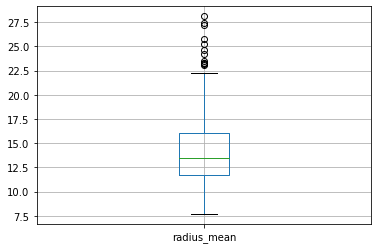

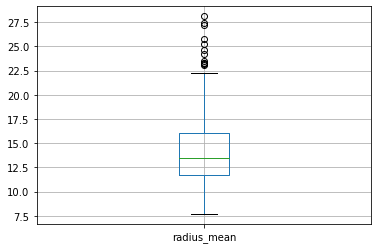

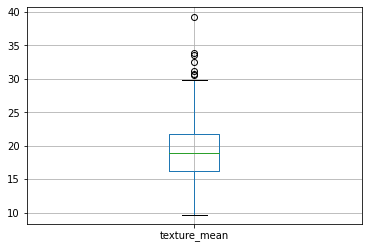

In [17]:
root = Tk()
root.title('Graph')
root.geometry("700x400")


def boxPlot():  
    brcc_df.boxplot(combo.get())
    plt.show()

def statictis():
    desc = brcc_df[combo.get()].describe()
    desc = desc.reset_index()
    
    my_tree['column'] = list(desc.columns)
    my_tree["show"] = "headings"
    
    for column in my_tree["column"]:
        my_tree.heading(column, text=column)
        my_tree.column(column, anchor=CENTER)
        
    desc = brcc_df[combo.get()].describe().reset_index().to_numpy().tolist()
    for row in desc:
        my_tree.insert("", "end", values=row)    
        
def remove_all():
    for record in my_tree.get_children():
        my_tree.delete(record)
    
# my_menu=Menu(root)
# root.config(menu=my_menu)
my_notebook = ttk.Notebook(root)
my_notebook.pack()

Data_frame = Frame(root,width=700,height=400)
Class_frame = Frame(root,width=700,height=400)

Data_frame.pack(fill='both',expand=1)
Class_frame.pack(fill='both',expand=1)

my_notebook.add(Data_frame,text='Data Analytics')
my_notebook.add(Class_frame,text='Classification')


lbl1 = Label(Data_frame,text='Vẽ biểu đồ cho mô hình',font=('Arial',30)).pack(pady=10)
    
options = list(brcc_df.columns[1:])

combo = ttk.Combobox(Data_frame,value=options)
combo.current(0)
combo.pack()

bar_chart_btn = Button(Data_frame,text='Create Boxplot',command=boxPlot)
bar_chart_btn.pack(pady=10)

statistic_btn = Button(Data_frame,text='Show Statictis ',command=statictis)
statistic_btn.pack(pady=10)

remove_btn = Button(Data_frame,text='Remove All ',command=remove_all)
remove_btn.pack()

my_tree = ttk.Treeview(Data_frame)
my_tree.pack(fill=X)

lbl2 = Label(Class_frame,text='Dự đoán mô hình',font=('Arial',30)).pack(pady=10)


root.mainloop()